In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)
L1 distance from Class 0 image to Class 1 image: 47896
L1 distance from Class 0 image to Class 2 image: 49426
L1 distance from Class 0 image to Class 3 image: 47472
L1 distance from Class 0 image to Class 4 image: 46868
L1 distance from Class 0 image to Class 5 image: 46095
L1 distance from Class 0 image to Class 6 image: 49453
L1 distance from Class 0 image to Class 7 image: 45810
L1 distance from Class 0 image to Class 8 image: 52407
L1 distance from Class 1 image to Class 0 image: 21110
L1 distance from Class 1 image to Class 2 image: 20355
L1 distance from Class 1 image to Class 3 image: 20466
L1 distance from Class 1 image to Class 4 image: 22284
L1 distance from Class 1 image to Class 5 image: 29030
L1 distance from Class 1 image to Class 6 image: 21870
L1 distance from Class 1 image to Class 7 image: 16311
L1 distance from Class 1 image to Class 8 image: 25142
L1 distance from Class 2 image to 

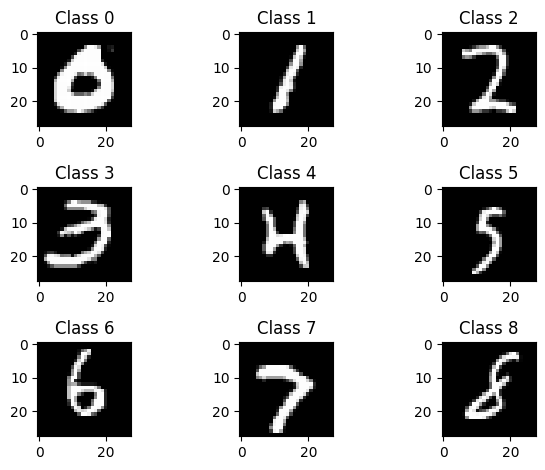

In [3]:
# Q1.1, Q1.2

import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical


mnist_data = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('y_test:  '  + str(y_test.shape))


# Function to calculate L1 distance between two images in MNIST dataset and randomly select one image from each class
def l1_distance(img1, img2):
    return np.sum(np.abs(img1 - img2))

# Loop through each class (assuming there are 9 classes)
for i in range(9):
    # Find all indices of the current class in the training set
    class_indices = [idx for idx, label in enumerate(y_train) if label == i]
    
    # Pick a random index from the class_indices
    random_idx = random.choice(class_indices)
    
    # Get the selected image for the current class
    selected_image = X_train[random_idx]
    
    # Plot the image of the selected class
    plt.subplot(3, 3, i + 1)
    plt.imshow(selected_image, cmap='gray', interpolation='none')
    plt.title(f"Class {y_train[random_idx]}")
    
    # Print the L1 distances to all other classes
    for other_class in range(9):
        if other_class != i:  # Avoid comparing with the same class
            # Find all indices of the other class
            other_class_indices = [idx for idx, label in enumerate(y_train) if label == other_class]
            
            # Pick a random index from the other class indices
            other_random_idx = random.choice(other_class_indices)
            
            # Get the image for the other class
            other_image = X_train[other_random_idx]
            
            # Calculate the L1 distance
            distance = l1_distance(selected_image, other_image)
            
            # Print the L1 distance
            print(f"L1 distance from Class {i} image to Class {other_class} image: {distance}")

plt.tight_layout()
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)
L1 distance from Class 0 image to Class 1 image: 312339
L1 distance from Class 0 image to Class 2 image: 447906
L1 distance from Class 0 image to Class 3 image: 400509
L1 distance from Class 0 image to Class 4 image: 412005
L1 distance from Class 0 image to Class 5 image: 413560
L1 distance from Class 0 image to Class 6 image: 454006
L1 distance from Class 0 image to Class 7 image: 377728
L1 distance from Class 0 image to Class 8 image: 404231
L1 distance from Class 1 image to Class 0 image: 437665
L1 distance from Class 1 image to Class 2 image: 459926
L1 distance from Class 1 image to Class 3 image: 378944
L1 distance from Class 1 image to Class 4 image: 431029
L1 distance from Class 1 image to Class 5 image: 376433
L1 distance from Class 1 image to Class 6 image: 376475
L1 distance from 

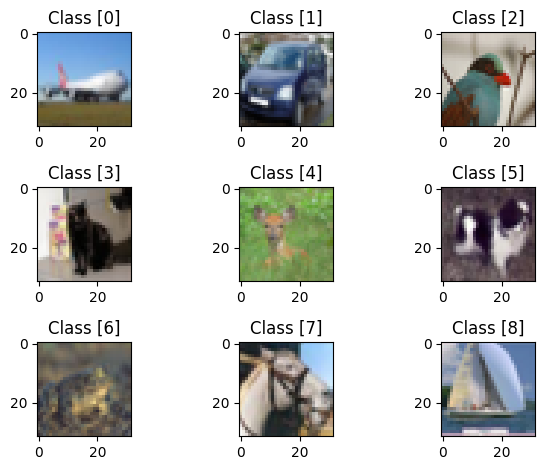

In [4]:
# Q1.3, Q1.4

(x_traincifar, y_traincifar), (x_testcifar, y_testcifar) = tf.keras.datasets.cifar10.load_data()

# Print some information about the dataset
print("Training data shape:", x_traincifar.shape)
print("Training labels shape:", y_traincifar.shape)
print("Testing data shape:", x_testcifar.shape)
print("Testing labels shape:", y_testcifar.shape)

# Function to calculate L1 distance between two images in CIFAR10 dataset and randomly select one image from each class
def l1_distance(img1, img2):
    return np.sum(np.abs(img1 - img2))

# Loop through each class (assuming there are 9 classes)
for i in range(9):
    # Find all indices of the current class in the training set
    class_indices = [idx for idx, label in enumerate(y_traincifar) if label == i]
    
    # Pick a random index from the class_indices
    random_idx = random.choice(class_indices)
    
    # Get the selected image for the current class
    selected_image = x_traincifar[random_idx]
    
    # Plot the image of the selected class
    plt.subplot(3, 3, i + 1)
    plt.imshow(selected_image, cmap='gray', interpolation='none')
    plt.title(f"Class {y_traincifar[random_idx]}")

  # Print the L1 distances to all other classes
    for other_class in range(9):
        if other_class != i:  # Avoid comparing with the same class
            # Find all indices of the other class
            other_class_indices = [idx for idx, label in enumerate(y_traincifar) if label == other_class]
            
            # Pick a random index from the other class indices
            other_random_idx = random.choice(other_class_indices)
            
            # Get the image for the other class
            other_image = x_traincifar[other_random_idx]
            
            # Calculate the L1 distance
            distance = l1_distance(selected_image, other_image)
            
            # Print the L1 distance
            print(f"L1 distance from Class {i} image to Class {other_class} image: {distance}")

plt.tight_layout()
plt.show()



Class 0:


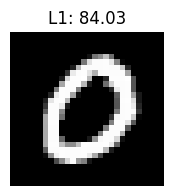

Class 1:


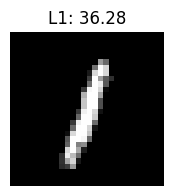

Class 2:


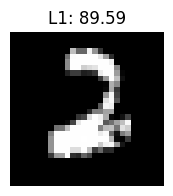

Class 3:


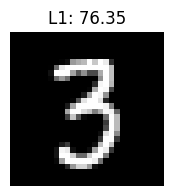

Class 4:


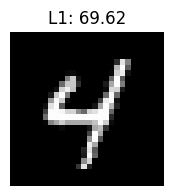

Class 5:


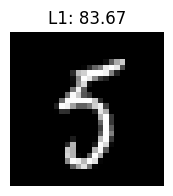

Class 6:


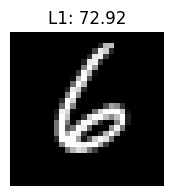

Class 7:


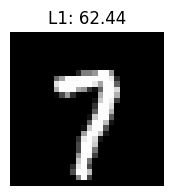

Class 8:


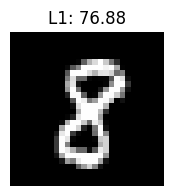

Class 9:


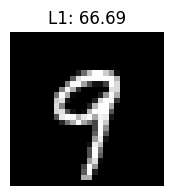

In [5]:
# Q1.5 for MNIST dataset

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), _ = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0

# Define the number of nearest neighbors to find
k = 1

# Calculate the mean image for each class
mean_images = []
for i in range(10):
    class_images = x_train[y_train == i]
    mean_image = np.mean(class_images, axis=0)
    mean_images.append(mean_image)

# Find the k nearest neighbors for each class
nearest_neighbors = []
for i in range(10):
    distances = np.sum(np.abs(x_train - mean_images[i]), axis=(1, 2))
    sorted_indices = np.argsort(distances)
    k_nearest_indices = sorted_indices[:k]
    nearest_neighbors.append(x_train[k_nearest_indices])

# Print and plot the k nearest neighbors for each class
for i in range(10):
    print(f"Class {i}:")
    plt.figure(figsize=(10, 2))
    for j in range(k):
        plt.subplot(1, k, j + 1)
        plt.imshow(nearest_neighbors[i][j], cmap='gray')
        plt.title(f"L1: {np.sum(np.abs(nearest_neighbors[i][j] - mean_images[i])):.2f}")
        plt.axis('off')
    plt.show()

Class 0:


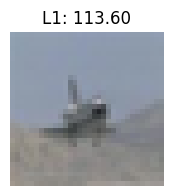

Class 1:


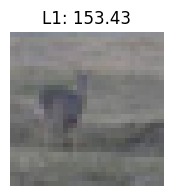

Class 2:


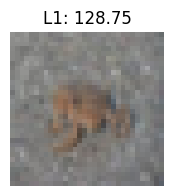

Class 3:


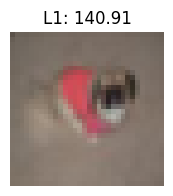

Class 4:


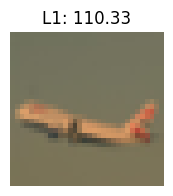

Class 5:


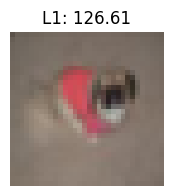

Class 6:


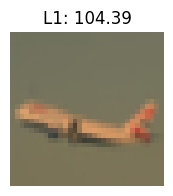

Class 7:


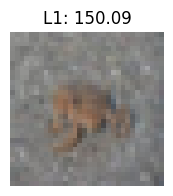

Class 8:


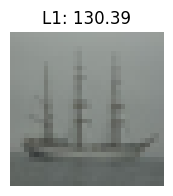

Class 9:


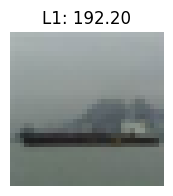

In [8]:
# Q1.5 for CIFAR10 dataset

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR10 dataset
(x_train, y_train), _ = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0

# Define the number of nearest neighbors to find
k = 1

# Calculate the mean image for each class
mean_images = []
for i in range(10):
    class_images = x_train[y_train.flatten() == i]
    mean_image = np.mean(class_images, axis=0)
    mean_images.append(mean_image)

# Find the k nearest neighbors for each class
nearest_neighbors = []
for i in range(10):
    distances = np.sum(np.abs(x_train - mean_images[i]), axis=(1, 2, 3))
    sorted_indices = np.argsort(distances)
    k_nearest_indices = sorted_indices[:k]
    nearest_neighbors.append(x_train[k_nearest_indices])

# Print and plot the k nearest neighbors for each class
for i in range(10):
    print(f"Class {i}:")
    plt.figure(figsize=(10, 2))
    for j in range(k):
        plt.subplot(1, k, j + 1)
        plt.imshow(nearest_neighbors[i][j], cmap='gray')
        plt.title(f"L1: {np.sum(np.abs(nearest_neighbors[i][j] - mean_images[i])):.2f}")
        plt.axis('off')
    plt.show()



L2 distance from Class 0 image to Class 1 image: 2036.9187514478824
L2 distance from Class 0 image to Class 2 image: 2155.767612707826
L2 distance from Class 0 image to Class 3 image: 2290.872977709589
L2 distance from Class 0 image to Class 4 image: 2196.5775652136667
L2 distance from Class 0 image to Class 5 image: 2164.349555871232
L2 distance from Class 0 image to Class 6 image: 2265.39135691827
L2 distance from Class 0 image to Class 7 image: 2054.428631031022
L2 distance from Class 0 image to Class 8 image: 2079.4819066296295
L2 distance from Class 1 image to Class 0 image: 2160.268270377547
L2 distance from Class 1 image to Class 2 image: 1803.9090886183815
L2 distance from Class 1 image to Class 3 image: 2195.3769607973936
L2 distance from Class 1 image to Class 4 image: 1896.0021097034676
L2 distance from Class 1 image to Class 5 image: 1959.9739794191146
L2 distance from Class 1 image to Class 6 image: 1853.3404975880715
L2 distance from Class 1 image to Class 7 image: 1785.5

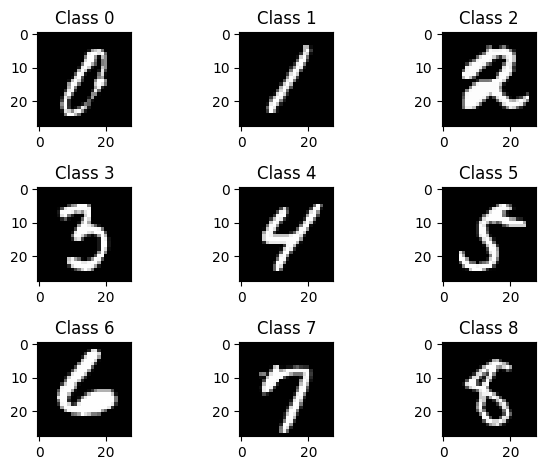

In [10]:
# Q1.6 for MNIST dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

#L2 distances for MNIST dataset

# Function to calculate L1 distance between two images
def l2_distance(img1, img2):
    return np.linalg.norm(img1.flatten() - img2.flatten())

# Loop through each class (assuming there are 9 classes)
for i in range(9):
    # Find all indices of the current class in the training set
    class_indices = [idx for idx, label in enumerate(y_train) if label == i]
    
    # Pick a random index from the class_indices
    random_idx = random.choice(class_indices)
    
    # Get the selected image for the current class
    selected_image = X_train[random_idx]
    
    # Plot the image of the selected class
    plt.subplot(3, 3, i + 1)
    plt.imshow(selected_image, cmap='gray', interpolation='none')
    plt.title(f"Class {y_train[random_idx]}")
    
    # Print the L2 distances to all other classes
    for other_class in range(9):
        if other_class != i:  # Avoid comparing with the same class
            # Find all indices of the other class
            other_class_indices = [idx for idx, label in enumerate(y_train) if label == other_class]
            
            # Pick a random index from the other class indices
            other_random_idx = random.choice(other_class_indices)
            
            # Get the image for the other class
            other_image = X_train[other_random_idx]
            
            # Calculate the L2 distance
            distance = l2_distance(selected_image, other_image)
            
            # Print the L2 distance
            print(f"L2 distance from Class {i} image to Class {other_class} image: {distance}")

plt.tight_layout()
plt.show()

Class 0:


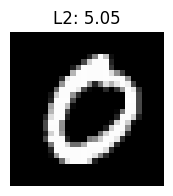

Class 1:


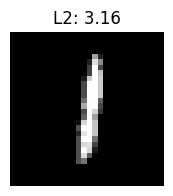

Class 2:


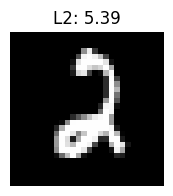

Class 3:


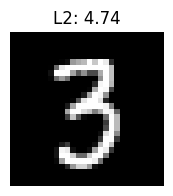

Class 4:


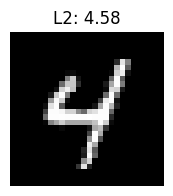

Class 5:


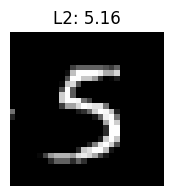

Class 6:


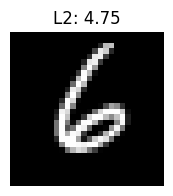

Class 7:


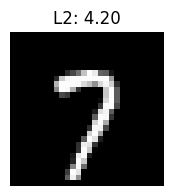

Class 8:


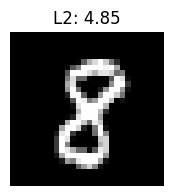

Class 9:


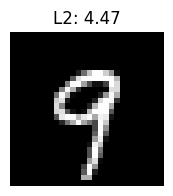

In [16]:
# Q1.6 for MNIST dataset, k = 1


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), _ = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0

# Define the number of nearest neighbors to find
k = 1

# Calculate the mean image for each class
mean_images = []
for i in range(10):
    class_images = x_train[y_train == i]
    mean_image = np.mean(class_images, axis=0)
    mean_images.append(mean_image)

# Find the k nearest neighbors for each class
nearest_neighbors = []
for i in range(10):
    distances = np.linalg.norm((x_train - mean_images[i]), axis=(1, 2))
    sorted_indices = np.argsort(distances)
    k_nearest_indices = sorted_indices[:k]
    nearest_neighbors.append(x_train[k_nearest_indices])

# Print and plot the k nearest neighbors for each class
for i in range(10):
    print(f"Class {i}:")
    plt.figure(figsize=(10, 2))
    for j in range(k):
        plt.subplot(1, k, j + 1)
        plt.imshow(nearest_neighbors[i][j], cmap='gray')
        plt.title(f"L2: {np.linalg.norm(nearest_neighbors[i][j] - mean_images[i]):.2f}")
        plt.axis('off')
    plt.show()

L2 distance from Class 0 image to Class 1 image: 9098.731724806485
L2 distance from Class 0 image to Class 2 image: 8293.478100290613
L2 distance from Class 0 image to Class 3 image: 7401.240233906747
L2 distance from Class 0 image to Class 4 image: 7365.525914692039
L2 distance from Class 0 image to Class 5 image: 7732.374214948472
L2 distance from Class 0 image to Class 6 image: 7584.73091150899
L2 distance from Class 0 image to Class 7 image: 8977.456042777374
L2 distance from Class 0 image to Class 8 image: 7802.605462279892
L2 distance from Class 0 image to Class 9 image: 8120.672324383
L2 distance from Class 1 image to Class 0 image: 9291.10623122995
L2 distance from Class 1 image to Class 2 image: 8614.590820230524
L2 distance from Class 1 image to Class 3 image: 8435.40212438032
L2 distance from Class 1 image to Class 4 image: 8613.745991146941
L2 distance from Class 1 image to Class 5 image: 8724.06287230898
L2 distance from Class 1 image to Class 6 image: 7617.424236577611
L2

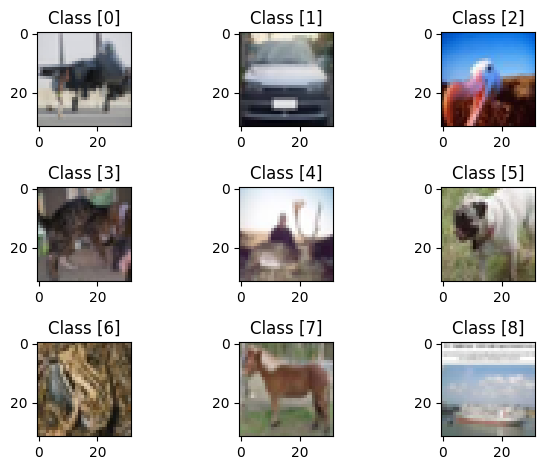

In [17]:
# Q1.6 for CIFAR10 dataset

(x_traincifar, y_traincifar), (x_testcifar, y_testcifar) = tf.keras.datasets.cifar10.load_data()

#L2 distances for CIFAR dataset

# Function to calculate L2 distance between two images
def l2_distance(img1, img2):
     return np.linalg.norm(img1.flatten() - img2.flatten())

# Loop through each class (assuming there are 9 classes)
for i in range(9):
    # Find all indices of the current class in the training set
    class_indices = [idx for idx, label in enumerate(y_traincifar) if label == i]
    
    # Pick a random index from the class_indices
    random_idx = random.choice(class_indices)
    
    # Get the selected image for the current class
    selected_image = x_traincifar[random_idx]
    
    # Plot the image of the selected class
    plt.subplot(3, 3, i + 1)
    plt.imshow(selected_image, cmap='gray', interpolation='none')
    plt.title(f"Class {y_traincifar[random_idx]}")

  # Print the L1 distances to all other classes
    for other_class in range(10):
        if other_class != i:  # Avoid comparing with the same class
            # Find all indices of the other class
            other_class_indices = [idx for idx, label in enumerate(y_traincifar) if label == other_class]
            
            # Pick a random index from the other class indices
            other_random_idx = random.choice(other_class_indices)
            
            # Get the image for the other class
            other_image = x_traincifar[other_random_idx]
            
            # Calculate the L2 distance
            distance = l2_distance(selected_image, other_image)
            
            # Print the L2 distance
            print(f"L2 distance from Class {i} image to Class {other_class} image: {distance}")

plt.tight_layout()
plt.show()

Class 0:


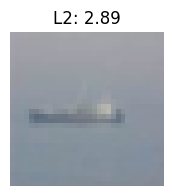

Class 1:


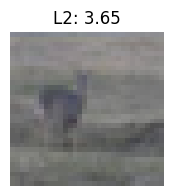

Class 2:


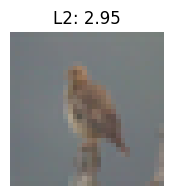

Class 3:


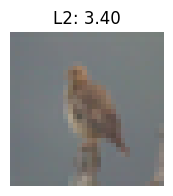

Class 4:


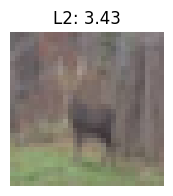

Class 5:


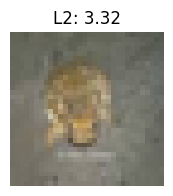

Class 6:


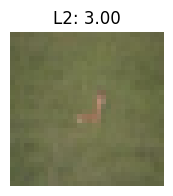

Class 7:


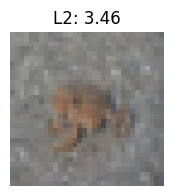

Class 8:


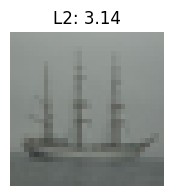

Class 9:


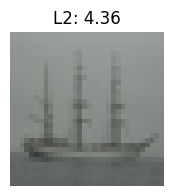

In [18]:
# Q1.6 for CIFAR10 dataset, K = 1

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR10 dataset
(x_train, y_train), _ = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0

# Define the number of nearest neighbors to find
k = 1

# Calculate the mean image for each class
mean_images = []
for i in range(10):
    class_images = x_train[y_train.flatten() == i]
    mean_image = np.mean(class_images, axis=0)
    mean_images.append(mean_image)

# Find the k nearest neighbors for each class
nearest_neighbors = []
for i in range(10):
    flat_images = x_train.reshape(x_train.shape[0], -1)
    flat_mean = mean_images[i].flatten()
    distances = np.linalg.norm((flat_images - flat_mean), axis=1)
    sorted_indices = np.argsort(distances)
    k_nearest_indices = sorted_indices[:k]
    nearest_neighbors.append(x_train[k_nearest_indices])

# Print and plot the k nearest neighbors for each class
for i in range(10):
    print(f"Class {i}:")
    plt.figure(figsize=(10, 2))
    for j in range(k):
        plt.subplot(1, k, j + 1)
        plt.imshow(nearest_neighbors[i][j])
        plt.title(f"L2: {np.linalg.norm(nearest_neighbors[i][j] - mean_images[i]):.2f}")
        plt.axis('off')
    plt.show()



L1 distance from Class 0 image to Class 1 image: 27987
L1 distance from Class 0 image to Class 2 image: 32585
L1 distance from Class 0 image to Class 3 image: 30230
L1 distance from Class 0 image to Class 4 image: 29992
L1 distance from Class 0 image to Class 5 image: 28246
L1 distance from Class 0 image to Class 6 image: 37870
L1 distance from Class 0 image to Class 7 image: 28491
L1 distance from Class 0 image to Class 8 image: 21943
L1 distance from Class 1 image to Class 0 image: 22243
L1 distance from Class 1 image to Class 2 image: 17483
L1 distance from Class 1 image to Class 3 image: 17330
L1 distance from Class 1 image to Class 4 image: 19960
L1 distance from Class 1 image to Class 5 image: 23484
L1 distance from Class 1 image to Class 6 image: 23334
L1 distance from Class 1 image to Class 7 image: 20087
L1 distance from Class 1 image to Class 8 image: 22260
L1 distance from Class 2 image to Class 0 image: 29134
L1 distance from Class 2 image to Class 1 image: 25531
L1 distanc

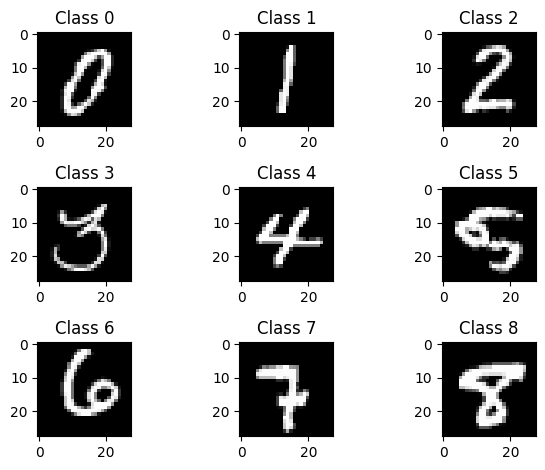

Class: 0
  Data point 1:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  19 117 141 192 110   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 120 225 252 252 253 234 131   7   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29
 185 253 252 252 252 253 252 252 203  38   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  51 234 252 253 227 177 252 253 252 252
 252 163   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29
 216 253 253 255 184   0  

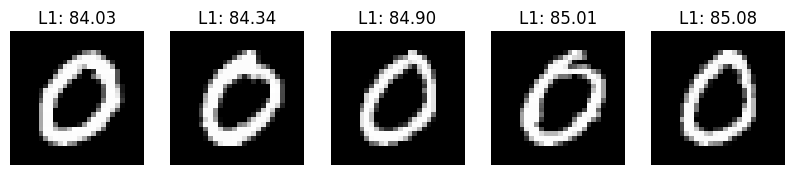

Class 1:


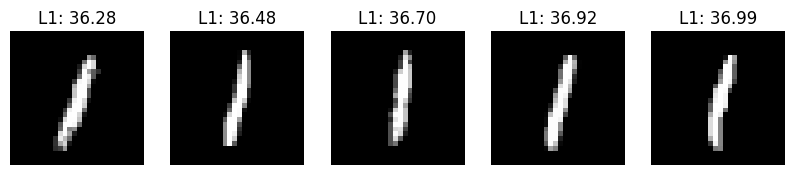

Class 2:


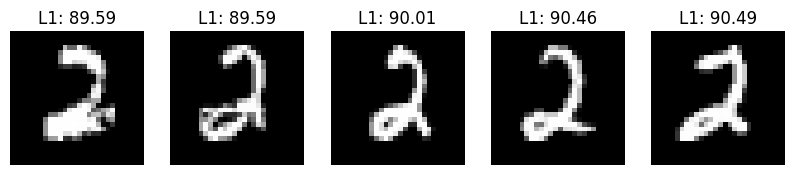

Class 3:


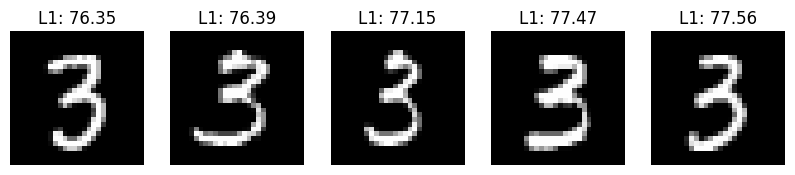

Class 4:


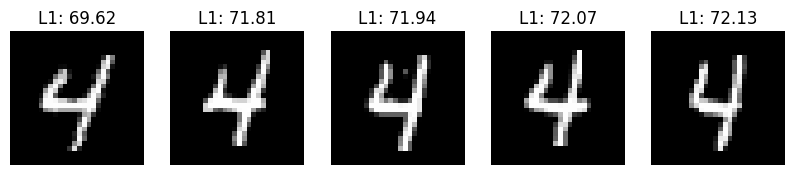

Class 5:


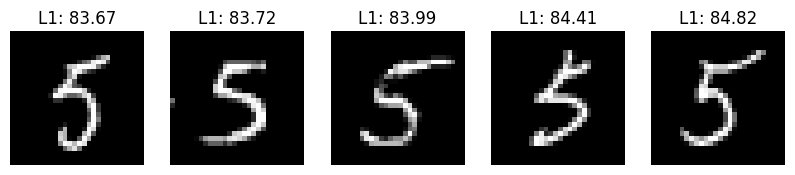

Class 6:


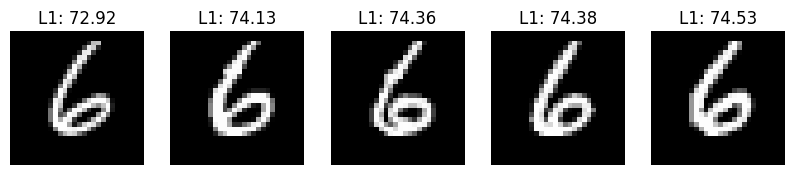

Class 7:


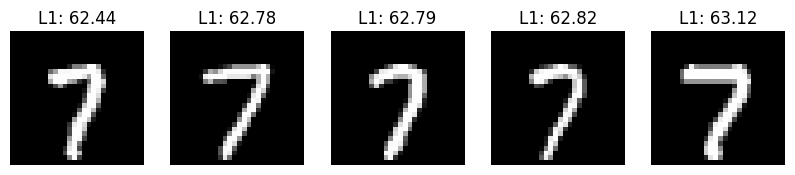

Class 8:


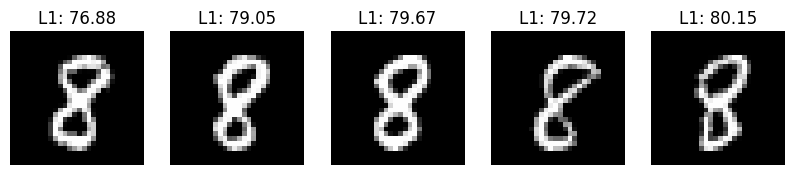

Class 9:


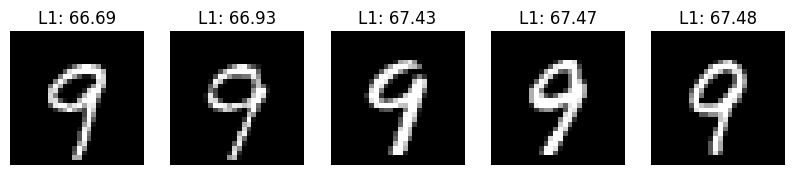

Execution time:  20.661282539367676 secs


In [19]:
# Q2.1, Q2.2, Q2.3

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import random
import time

start_time = time.time()
# Load the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Function to calculate L1 distance between two images
def l1_distance(img1, img2):
    return np.sum(np.abs(img1 - img2))

# Loop through each class (assuming there are 9 classes)
for i in range(9):
    # Find all indices of the current class in the training set
    class_indices = [idx for idx, label in enumerate(y_train_full) if label == i]
    
    # Pick a random index from the class_indices
    random_idx = random.choice(class_indices)
    
    # Get the selected image for the current class
    selected_image = X_train_full[random_idx]
    
    # Plot the image of the selected class
    plt.subplot(3, 3, i + 1)
    plt.imshow(selected_image, cmap='gray', interpolation='none')
    plt.title(f"Class {y_train_full[random_idx]}")
    
    # Print the L1 distances to all other classes
    for other_class in range(9):
        if other_class != i:  # Avoid comparing with the same class
            # Find all indices of the other class
            other_class_indices = [idx for idx, label in enumerate(y_train_full) if label == other_class]
            
            # Pick a random index from the other class indices
            other_random_idx = random.choice(other_class_indices)
            
            # Get the image for the other class
            other_image = X_train_full[other_random_idx]
            
            # Calculate the L1 distance
            distance = l1_distance(selected_image, other_image)
            
            # Print the L1 distance
            print(f"L1 distance from Class {i} image to Class {other_class} image: {distance}")

plt.tight_layout()
plt.show()

# Flatten the images
x_train_flat = X_train_full.reshape(X_train_full.shape[0], -1)

def l1_distance(x1, x2):
  """Calculates the L1 distance between two data points."""
  return np.sum(np.abs(x1 - x2))

def k_smallest_l1_distances(data, labels, k=10):
  """Finds the k data points with the smallest L1 distances for each class.

  Args:
      data: The dataset (flattened images).
      labels: The labels for each data point.
      k: The number of smallest distances to retrieve.

  Returns:
      A dictionary where keys are class labels and values are lists of k data
      points with the smallest L1 distances to the class mean.
  """
  class_means = {}
  for i in range(10):
    class_means[i] = np.mean(data[labels == i], axis=0)

  smallest_distances = {}
  for i in range(10):
    distances = [l1_distance(data[j], class_means[i]) for j in range(len(data))]
    sorted_indices = np.argsort(distances)
    smallest_distances[i] = data[sorted_indices[:k]]
  return smallest_distances

# Find the 5 data points with the smallest L1 distances for each class
k_values = 5
result = k_smallest_l1_distances(x_train_flat, y_train_full, k=k_values)

# Print the results
for class_label, data_points in result.items():
  print(f"Class: {class_label}")
  for i, point in enumerate(data_points):
    print(f"  Data point {i + 1}:")
    print(point)


# Normalize the pixel values to be between 0 and 1
x_train_norm = X_train_full.astype('float32') / 255.0

# Define the number of nearest neighbors to find
k = 5

# Calculate the mean image for each class
mean_images = []
for i in range(10):
    class_images = x_train_norm[y_train_full == i]
    mean_image = np.mean(class_images, axis=0)
    mean_images.append(mean_image)

# Find the k nearest neighbors for each class
nearest_neighbors = []
for i in range(10):
    distances = np.sum(np.abs(x_train_norm - mean_images[i]), axis=(1, 2))
    sorted_indices = np.argsort(distances)
    k_nearest_indices = sorted_indices[:k]
    nearest_neighbors.append(x_train_norm[k_nearest_indices])

# Print and plot the k nearest neighbors for each class
for i in range(10):
    print(f"Class {i}:")
    plt.figure(figsize=(10, 2))
    for j in range(k):
        plt.subplot(1, k, j + 1)
        plt.imshow(nearest_neighbors[i][j], cmap='gray')
        plt.title(f"L1: {np.sum(np.abs(nearest_neighbors[i][j] - mean_images[i])):.2f}")
        plt.axis('off')
    plt.show()

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


L1 distance from Class 0 image to Class 1 image: 37476
L1 distance from Class 0 image to Class 2 image: 38791
L1 distance from Class 0 image to Class 3 image: 34184
L1 distance from Class 0 image to Class 4 image: 37578
L1 distance from Class 0 image to Class 5 image: 32417
L1 distance from Class 0 image to Class 6 image: 30706
L1 distance from Class 0 image to Class 7 image: 37289
L1 distance from Class 0 image to Class 8 image: 36195
L1 distance from Class 1 image to Class 0 image: 23991
L1 distance from Class 1 image to Class 2 image: 21903
L1 distance from Class 1 image to Class 3 image: 24599
L1 distance from Class 1 image to Class 4 image: 21641
L1 distance from Class 1 image to Class 5 image: 24342
L1 distance from Class 1 image to Class 6 image: 22051
L1 distance from Class 1 image to Class 7 image: 21904
L1 distance from Class 1 image to Class 8 image: 27963
L1 distance from Class 2 image to Class 0 image: 35378
L1 distance from Class 2 image to Class 1 image: 30409
L1 distanc

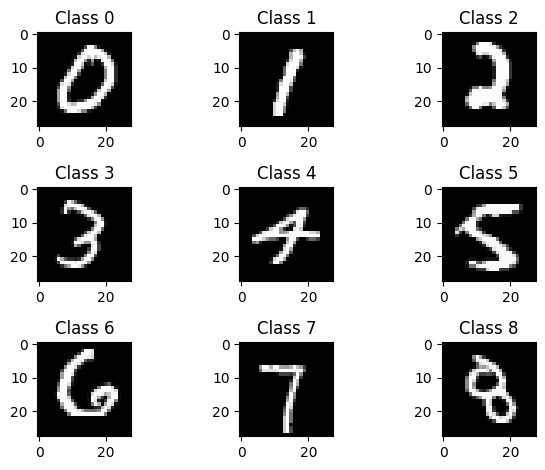

Class: 0
  Data point 1:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  19 117 141 192 110   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 120 225 252 252 253 234 131   7   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29
 185 253 252 252 252 253 252 252 203  38   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  51 234 252 253 227 177 252 253 252 252
 252 163   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29
 216 253 253 255 184   0  

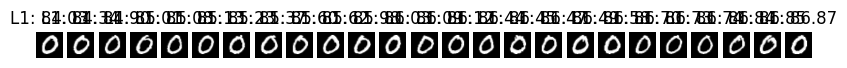

Class 1:


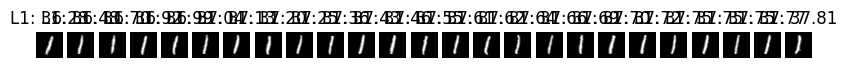

Class 2:


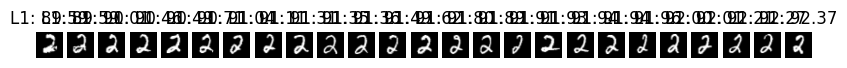

Class 3:


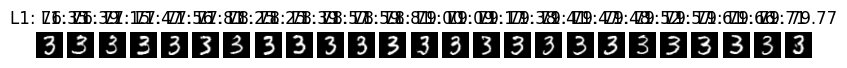

Class 4:


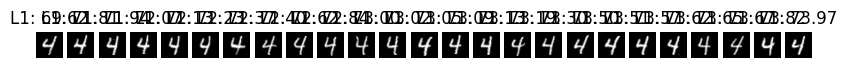

Class 5:


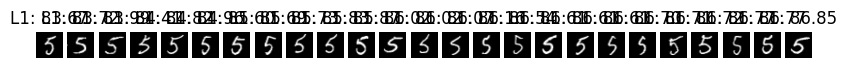

Class 6:


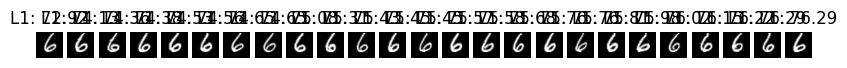

Class 7:


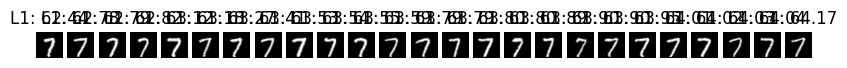

Class 8:


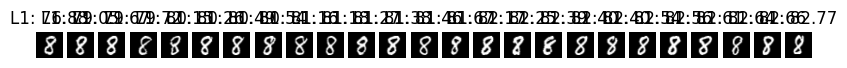

Class 9:


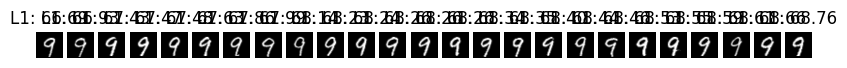

Execution time:  31.033414602279663 secs


In [21]:
#Q2.4, k = 25

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import random
import time

start_time = time.time()
# Load the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Function to calculate L1 distance between two images
def l1_distance(img1, img2):
    return np.sum(np.abs(img1 - img2))

# Loop through each class (assuming there are 9 classes)
for i in range(9):
    # Find all indices of the current class in the training set
    class_indices = [idx for idx, label in enumerate(y_train_full) if label == i]
    
    # Pick a random index from the class_indices
    random_idx = random.choice(class_indices)
    
    # Get the selected image for the current class
    selected_image = X_train_full[random_idx]
    
    # Plot the image of the selected class
    plt.subplot(3, 3, i + 1)
    plt.imshow(selected_image, cmap='gray', interpolation='none')
    plt.title(f"Class {y_train_full[random_idx]}")
    
    # Print the L1 distances to all other classes
    for other_class in range(9):
        if other_class != i:  # Avoid comparing with the same class
            # Find all indices of the other class
            other_class_indices = [idx for idx, label in enumerate(y_train_full) if label == other_class]
            
            # Pick a random index from the other class indices
            other_random_idx = random.choice(other_class_indices)
            
            # Get the image for the other class
            other_image = X_train_full[other_random_idx]
            
            # Calculate the L1 distance
            distance = l1_distance(selected_image, other_image)
            
            # Print the L1 distance
            print(f"L1 distance from Class {i} image to Class {other_class} image: {distance}")

plt.tight_layout()
plt.show()

# Flatten the images
x_train_flat = X_train_full.reshape(X_train_full.shape[0], -1)

def l1_distance(x1, x2):
  """Calculates the L1 distance between two data points."""
  return np.sum(np.abs(x1 - x2))

def k_smallest_l1_distances(data, labels, k=10):
  """Finds the k data points with the smallest L1 distances for each class.

  Args:
      data: The dataset (flattened images).
      labels: The labels for each data point.
      k: The number of smallest distances to retrieve.

  Returns:
      A dictionary where keys are class labels and values are lists of k data
      points with the smallest L1 distances to the class mean.
  """
  class_means = {}
  for i in range(10):
    class_means[i] = np.mean(data[labels == i], axis=0)

  smallest_distances = {}
  for i in range(10):
    distances = [l1_distance(data[j], class_means[i]) for j in range(len(data))]
    sorted_indices = np.argsort(distances)
    smallest_distances[i] = data[sorted_indices[:k]]
  return smallest_distances

# Find the 5 data points with the smallest L1 distances for each class
k_values = 5
result = k_smallest_l1_distances(x_train_flat, y_train_full, k=k_values)

# Print the results
for class_label, data_points in result.items():
  print(f"Class: {class_label}")
  for i, point in enumerate(data_points):
    print(f"  Data point {i + 1}:")
    print(point)


# Normalize the pixel values to be between 0 and 1
x_train_norm = X_train_full.astype('float32') / 255.0

# Define the number of nearest neighbors to find
k = 25

# Calculate the mean image for each class
mean_images = []
for i in range(10):
    class_images = x_train_norm[y_train_full == i]
    mean_image = np.mean(class_images, axis=0)
    mean_images.append(mean_image)

# Find the k nearest neighbors for each class
nearest_neighbors = []
for i in range(10):
    distances = np.sum(np.abs(x_train_norm - mean_images[i]), axis=(1, 2))
    sorted_indices = np.argsort(distances)
    k_nearest_indices = sorted_indices[:k]
    nearest_neighbors.append(x_train_norm[k_nearest_indices])

# Print and plot the k nearest neighbors for each class
for i in range(10):
    print(f"Class {i}:")
    plt.figure(figsize=(10, 2))
    for j in range(k):
        plt.subplot(1, k, j + 1)
        plt.imshow(nearest_neighbors[i][j], cmap='gray')
        plt.title(f"L1: {np.sum(np.abs(nearest_neighbors[i][j] - mean_images[i])):.2f}")
        plt.axis('off')
    plt.show()

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

L1 distance from Class 0 image to Class 1 image: 26128
L1 distance from Class 0 image to Class 2 image: 28550
L1 distance from Class 0 image to Class 3 image: 26683
L1 distance from Class 0 image to Class 4 image: 24700
L1 distance from Class 0 image to Class 5 image: 28310
L1 distance from Class 0 image to Class 6 image: 24846
L1 distance from Class 0 image to Class 7 image: 24872
L1 distance from Class 0 image to Class 8 image: 24920
L1 distance from Class 1 image to Class 0 image: 21010
L1 distance from Class 1 image to Class 2 image: 22228
L1 distance from Class 1 image to Class 3 image: 20936
L1 distance from Class 1 image to Class 4 image: 21864
L1 distance from Class 1 image to Class 5 image: 21070
L1 distance from Class 1 image to Class 6 image: 17840
L1 distance from Class 1 image to Class 7 image: 17824
L1 distance from Class 1 image to Class 8 image: 24191
L1 distance from Class 2 image to Class 0 image: 38684
L1 distance from Class 2 image to Class 1 image: 28003
L1 distanc

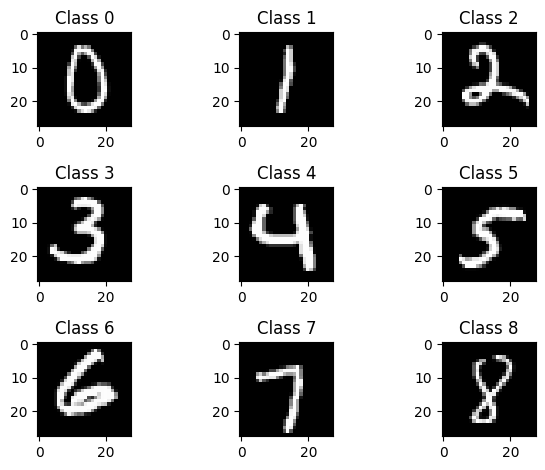

Class: 0
  Data point 1:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  19 117 141 192 110   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 120 225 252 252 253 234 131   7   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29
 185 253 252 252 252 253 252 252 203  38   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  51 234 252 253 227 177 252 253 252 252
 252 163   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29
 216 253 253 255 184   0  

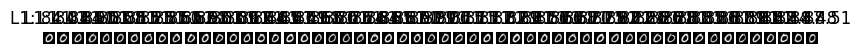

Class 1:


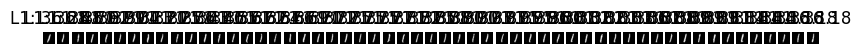

Class 2:


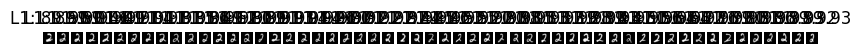

Class 3:


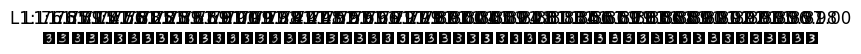

Class 4:


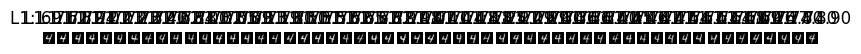

Class 5:


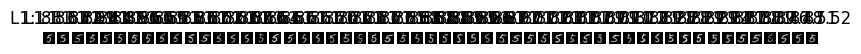

Class 6:


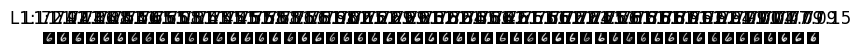

Class 7:


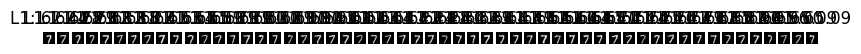

Class 8:


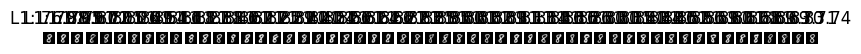

Class 9:


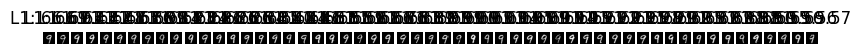

Execution time:  45.685747385025024 secs


In [20]:
#Q2.4, k = 55

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import random
import time

start_time = time.time()
# Load the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Function to calculate L1 distance between two images
def l1_distance(img1, img2):
    return np.sum(np.abs(img1 - img2))

# Loop through each class (assuming there are 9 classes)
for i in range(9):
    # Find all indices of the current class in the training set
    class_indices = [idx for idx, label in enumerate(y_train_full) if label == i]
    
    # Pick a random index from the class_indices
    random_idx = random.choice(class_indices)
    
    # Get the selected image for the current class
    selected_image = X_train_full[random_idx]
    
    # Plot the image of the selected class
    plt.subplot(3, 3, i + 1)
    plt.imshow(selected_image, cmap='gray', interpolation='none')
    plt.title(f"Class {y_train_full[random_idx]}")
    
    # Print the L1 distances to all other classes
    for other_class in range(9):
        if other_class != i:  # Avoid comparing with the same class
            # Find all indices of the other class
            other_class_indices = [idx for idx, label in enumerate(y_train_full) if label == other_class]
            
            # Pick a random index from the other class indices
            other_random_idx = random.choice(other_class_indices)
            
            # Get the image for the other class
            other_image = X_train_full[other_random_idx]
            
            # Calculate the L1 distance
            distance = l1_distance(selected_image, other_image)
            
            # Print the L1 distance
            print(f"L1 distance from Class {i} image to Class {other_class} image: {distance}")

plt.tight_layout()
plt.show()

# Flatten the images
x_train_flat = X_train_full.reshape(X_train_full.shape[0], -1)

def l1_distance(x1, x2):
  """Calculates the L1 distance between two data points."""
  return np.sum(np.abs(x1 - x2))

def k_smallest_l1_distances(data, labels, k=10):
  """Finds the k data points with the smallest L1 distances for each class.

  Args:
      data: The dataset (flattened images).
      labels: The labels for each data point.
      k: The number of smallest distances to retrieve.

  Returns:
      A dictionary where keys are class labels and values are lists of k data
      points with the smallest L1 distances to the class mean.
  """
  class_means = {}
  for i in range(10):
    class_means[i] = np.mean(data[labels == i], axis=0)

  smallest_distances = {}
  for i in range(10):
    distances = [l1_distance(data[j], class_means[i]) for j in range(len(data))]
    sorted_indices = np.argsort(distances)
    smallest_distances[i] = data[sorted_indices[:k]]
  return smallest_distances

# Find the 5 data points with the smallest L1 distances for each class
k_values = 5
result = k_smallest_l1_distances(x_train_flat, y_train_full, k=k_values)

# Print the results
for class_label, data_points in result.items():
  print(f"Class: {class_label}")
  for i, point in enumerate(data_points):
    print(f"  Data point {i + 1}:")
    print(point)


# Normalize the pixel values to be between 0 and 1
x_train_norm = X_train_full.astype('float32') / 255.0

# Define the number of nearest neighbors to find
k = 55

# Calculate the mean image for each class
mean_images = []
for i in range(10):
    class_images = x_train_norm[y_train_full == i]
    mean_image = np.mean(class_images, axis=0)
    mean_images.append(mean_image)

# Find the k nearest neighbors for each class
nearest_neighbors = []
for i in range(10):
    distances = np.sum(np.abs(x_train_norm - mean_images[i]), axis=(1, 2))
    sorted_indices = np.argsort(distances)
    k_nearest_indices = sorted_indices[:k]
    nearest_neighbors.append(x_train_norm[k_nearest_indices])

# Print and plot the k nearest neighbors for each class
for i in range(10):
    print(f"Class {i}:")
    plt.figure(figsize=(10, 2))
    for j in range(k):
        plt.subplot(1, k, j + 1)
        plt.imshow(nearest_neighbors[i][j], cmap='gray')
        plt.title(f"L1: {np.sum(np.abs(nearest_neighbors[i][j] - mean_images[i])):.2f}")
        plt.axis('off')
    plt.show()

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")



L1 distance from Class 0 image to Class 1 image: 39187
L1 distance from Class 0 image to Class 2 image: 37241
L1 distance from Class 0 image to Class 3 image: 36370
L1 distance from Class 0 image to Class 4 image: 38978
L1 distance from Class 0 image to Class 5 image: 37846
L1 distance from Class 0 image to Class 6 image: 39127
L1 distance from Class 0 image to Class 7 image: 36983
L1 distance from Class 0 image to Class 8 image: 41364
L1 distance from Class 1 image to Class 0 image: 22124
L1 distance from Class 1 image to Class 2 image: 20372
L1 distance from Class 1 image to Class 3 image: 20360
L1 distance from Class 1 image to Class 4 image: 20912
L1 distance from Class 1 image to Class 5 image: 26901
L1 distance from Class 1 image to Class 6 image: 21930
L1 distance from Class 1 image to Class 7 image: 16074
L1 distance from Class 1 image to Class 8 image: 19381
L1 distance from Class 2 image to Class 0 image: 38488
L1 distance from Class 2 image to Class 1 image: 35826
L1 distanc

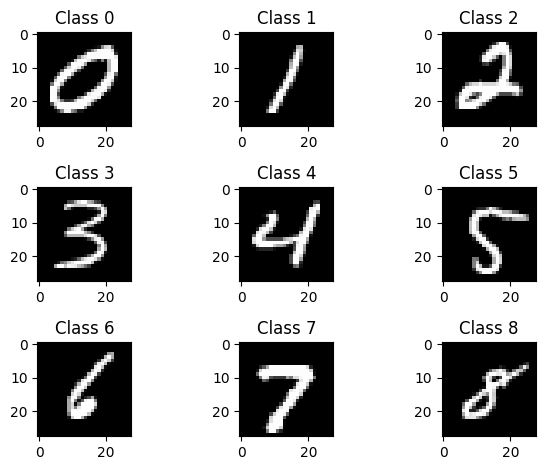

Class: 0
  Data point 1:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  19 117 141 192 110   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 120 225 252 252 253 234 131   7   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29
 185 253 252 252 252 253 252 252 203  38   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  51 234 252 253 227 177 252 253 252 252
 252 163   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29
 216 253 253 255 184   0  

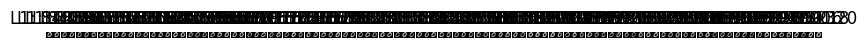

Class 1:


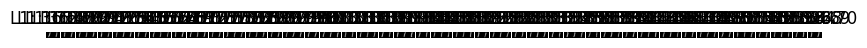

Class 2:


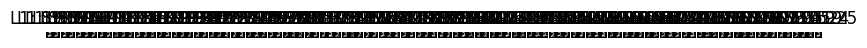

Class 3:


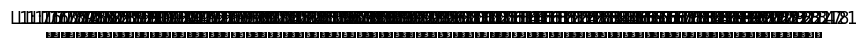

Class 4:


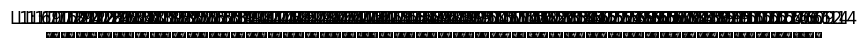

Class 5:


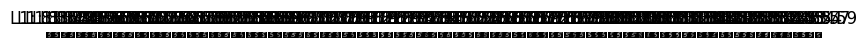

Class 6:


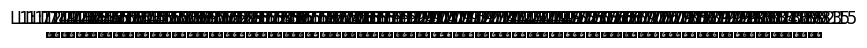

Class 7:


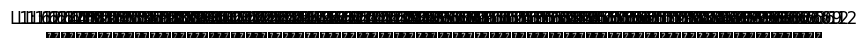

Class 8:


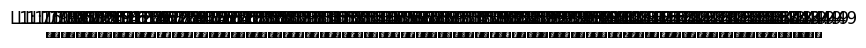

Class 9:


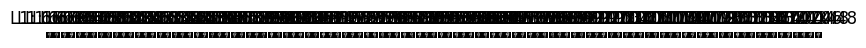

Execution time:  72.18449378013611 secs


In [22]:
#Q2.4, k = 105

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import random
import time

start_time = time.time()
# Load the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Function to calculate L1 distance between two images
def l1_distance(img1, img2):
    return np.sum(np.abs(img1 - img2))

# Loop through each class (assuming there are 9 classes)
for i in range(9):
    # Find all indices of the current class in the training set
    class_indices = [idx for idx, label in enumerate(y_train_full) if label == i]
    
    # Pick a random index from the class_indices
    random_idx = random.choice(class_indices)
    
    # Get the selected image for the current class
    selected_image = X_train_full[random_idx]
    
    # Plot the image of the selected class
    plt.subplot(3, 3, i + 1)
    plt.imshow(selected_image, cmap='gray', interpolation='none')
    plt.title(f"Class {y_train_full[random_idx]}")
    
    # Print the L1 distances to all other classes
    for other_class in range(9):
        if other_class != i:  # Avoid comparing with the same class
            # Find all indices of the other class
            other_class_indices = [idx for idx, label in enumerate(y_train_full) if label == other_class]
            
            # Pick a random index from the other class indices
            other_random_idx = random.choice(other_class_indices)
            
            # Get the image for the other class
            other_image = X_train_full[other_random_idx]
            
            # Calculate the L1 distance
            distance = l1_distance(selected_image, other_image)
            
            # Print the L1 distance
            print(f"L1 distance from Class {i} image to Class {other_class} image: {distance}")

plt.tight_layout()
plt.show()

# Flatten the images
x_train_flat = X_train_full.reshape(X_train_full.shape[0], -1)

def l1_distance(x1, x2):
  """Calculates the L1 distance between two data points."""
  return np.sum(np.abs(x1 - x2))

def k_smallest_l1_distances(data, labels, k=10):
  """Finds the k data points with the smallest L1 distances for each class.

  Args:
      data: The dataset (flattened images).
      labels: The labels for each data point.
      k: The number of smallest distances to retrieve.

  Returns:
      A dictionary where keys are class labels and values are lists of k data
      points with the smallest L1 distances to the class mean.
  """
  class_means = {}
  for i in range(10):
    class_means[i] = np.mean(data[labels == i], axis=0)

  smallest_distances = {}
  for i in range(10):
    distances = [l1_distance(data[j], class_means[i]) for j in range(len(data))]
    sorted_indices = np.argsort(distances)
    smallest_distances[i] = data[sorted_indices[:k]]
  return smallest_distances

# Find the 5 data points with the smallest L1 distances for each class
k_values = 5
result = k_smallest_l1_distances(x_train_flat, y_train_full, k=k_values)

# Print the results
for class_label, data_points in result.items():
  print(f"Class: {class_label}")
  for i, point in enumerate(data_points):
    print(f"  Data point {i + 1}:")
    print(point)


# Normalize the pixel values to be between 0 and 1
x_train_norm = X_train_full.astype('float32') / 255.0

# Define the number of nearest neighbors to find
k = 105

# Calculate the mean image for each class
mean_images = []
for i in range(10):
    class_images = x_train_norm[y_train_full == i]
    mean_image = np.mean(class_images, axis=0)
    mean_images.append(mean_image)

# Find the k nearest neighbors for each class
nearest_neighbors = []
for i in range(10):
    distances = np.sum(np.abs(x_train_norm - mean_images[i]), axis=(1, 2))
    sorted_indices = np.argsort(distances)
    k_nearest_indices = sorted_indices[:k]
    nearest_neighbors.append(x_train_norm[k_nearest_indices])

# Print and plot the k nearest neighbors for each class
for i in range(10):
    print(f"Class {i}:")
    plt.figure(figsize=(10, 2))
    for j in range(k):
        plt.subplot(1, k, j + 1)
        plt.imshow(nearest_neighbors[i][j], cmap='gray')
        plt.title(f"L1: {np.sum(np.abs(nearest_neighbors[i][j] - mean_images[i])):.2f}")
        plt.axis('off')
    plt.show()

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
L2 distance from Class 0 image to Class 1 image: 1835.2141564406047
L2 distance from Class 0 image to Class 2 image: 2024.3117348866997
L2 distance from Class 0 image to Class 3 image: 1882.5001992031766
L2 distance from Class 0 image to Class 4 image: 1949.168284166352
L2 distance from Class 0 image to Class 5 image: 1776.9991558804973
L2 distance from Class 0 image to Class 6 image: 1699.8126367338255
L2 distance from Class 0 image to Class 7 image: 1880.6025630100582
L2 distance from Class 0 image to Class 8 image: 1816.5805790000068
L2 distance from Class 1 image to Class 0 image: 2594.6855300787415
L2 distance from Class 1 image to Class 2 image: 2577.4811347515233
L2 distance from Class 1 image to Class 3 image: 2423.222647632693
L2 distance from Class 1 image to Class 4 image: 2579.0341215268945
L2 distance from Class 1 image to Class 5 image: 2478.0474168183305
L2 distance from Class 1 image to Class 6 image: 2673.586542455658


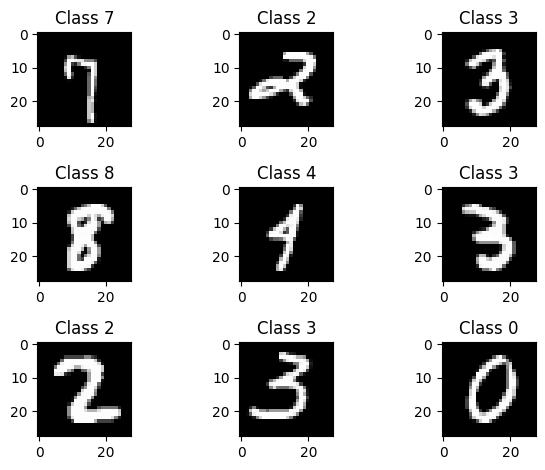

Class: 0
  Data point 1:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  32 129 253 192
   15   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  73 207 252 252 253
   35   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  27 120 253 252 252 252 253
   56   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1 181 252 253 252 252 252 253
  221 144  62   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  

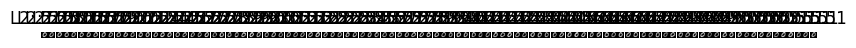

Class 1:


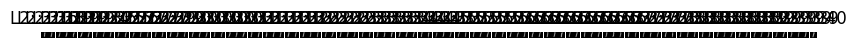

Class 2:


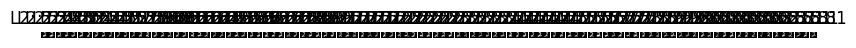

Class 3:


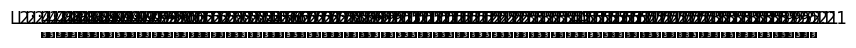

Class 4:


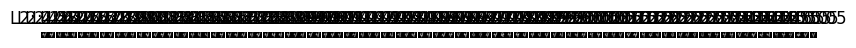

Class 5:


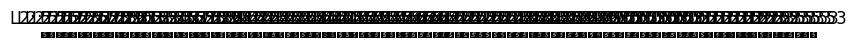

Class 6:


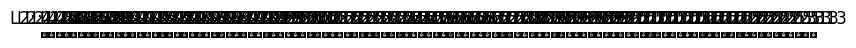

Class 7:


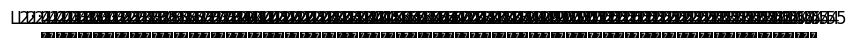

Class 8:


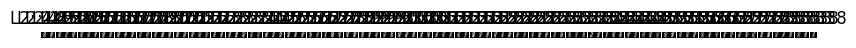

Class 9:


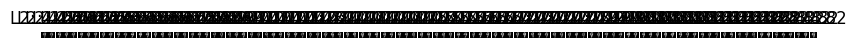

Execution time:  69.37023138999939 secs


In [1]:
# Q2.5

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import random
import time

start_time = time.time()
# Load the MNIST dataset
(X_train_full2, y_train_full2), (X_test, y_test) = mnist.load_data()

X_train, X_test, y_train, y_test = train_test_split(X_train_full2, y_train_full2, test_size=0.2, random_state=42)

#L2 distances for MNIST dataset

# Function to calculate L2 distance between two images
def l2_distance(img1, img2):
    return np.linalg.norm(img1.flatten() - img2.flatten())

# Loop through each class (assuming there are 9 classes)
for i in range(9):
    # Find all indices of the current class in the training set
    class_indices = [idx for idx, label in enumerate(y_train) if label == i]
    
    # Pick a random index from the class_indices
    random_idx = random.choice(class_indices)
    
    # Get the selected image for the current class
    selected_image = X_train_full2[random_idx]
    
    # Plot the image of the selected class
    plt.subplot(3, 3, i + 1)
    plt.imshow(selected_image, cmap='gray', interpolation='none')
    plt.title(f"Class {y_train_full2[random_idx]}")
    
    # Print the L2 distances to all other classes
    for other_class in range(9):
        if other_class != i:  # Avoid comparing with the same class
            # Find all indices of the other class
            other_class_indices = [idx for idx, label in enumerate(y_train) if label == other_class]
            
            # Pick a random index from the other class indices
            other_random_idx = random.choice(other_class_indices)
            
            # Get the image for the other class
            other_image = X_train_full2[other_random_idx]
            
            # Calculate the L2 distance
            distance = l2_distance(selected_image, other_image)
            
            # Print the L2 distance
            print(f"L2 distance from Class {i} image to Class {other_class} image: {distance}")

plt.tight_layout()
plt.show()

def k_smallest_l2_distances(data, labels, k=10):
  """Finds the k data points with the smallest L1 distances for each class.

  Args:
      data: The dataset (flattened images).
      labels: The labels for each data point.
      k: The number of smallest distances to retrieve.

  Returns:
      A dictionary where keys are class labels and values are lists of k data
      points with the smallest L1 distances to the class mean.
  """
  class_means = {}
  for i in range(10):
    class_means[i] = np.mean(data[labels == i], axis=0)

  smallest_distances = {}
  for i in range(10):
    distances = [l2_distance(data[j], class_means[i]) for j in range(len(data))]
    sorted_indices = np.argsort(distances)
    smallest_distances[i] = data[sorted_indices[:k]]
  return smallest_distances

# Find the 5 data points with the smallest L2 distances for each class
k_values = 1
result = k_smallest_l2_distances(X_train_full2, y_train_full2, k=k_values)

# Print the results
for class_label, data_points in result.items():
  print(f"Class: {class_label}")
  for i, point in enumerate(data_points):
    print(f"  Data point {i + 1}:")
    print(point)


# Normalize the pixel values to be between 0 and 1
x_train_norm2 = X_train_full2.astype('float32') / 255.0

# Define the number of nearest neighbors to find
k = 5
k = 25
k = 55
k = 105

# Calculate the mean image for each class
mean_images = []
for i in range(10):
    class_images = x_train_norm2[y_train_full2.flatten() == i]
    mean_image = np.mean(class_images, axis=0)
    mean_images.append(mean_image)

# Find the k nearest neighbors for each class
nearest_neighbors = []
for i in range(10):
    flat_images = x_train_norm2.reshape(x_train_norm2.shape[0], -1)
    flat_mean = mean_images[i].flatten()
    distances = np.linalg.norm((flat_images - flat_mean), axis=1)
    sorted_indices = np.argsort(distances)
    k_nearest_indices = sorted_indices[:k]
    nearest_neighbors.append(x_train_norm2[k_nearest_indices])

# Print and plot the k nearest neighbors for each class
for i in range(10):
    print(f"Class {i}:")
    plt.figure(figsize=(10, 2))
    for j in range(k):
        plt.subplot(1, k, j + 1)
        plt.imshow(nearest_neighbors[i][j], cmap='gray')
        plt.title(f"L2: {np.linalg.norm(nearest_neighbors[i][j] - mean_images[i]):.2f}")
        plt.axis('off')
    plt.show()


end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

2.17.1


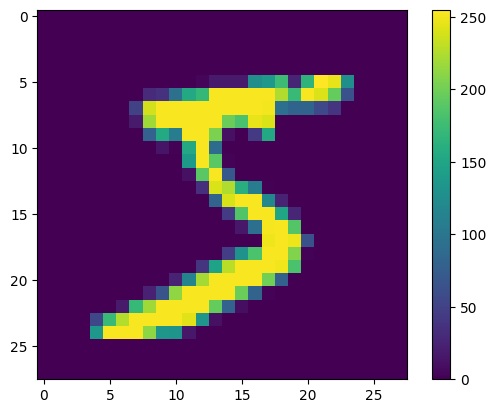

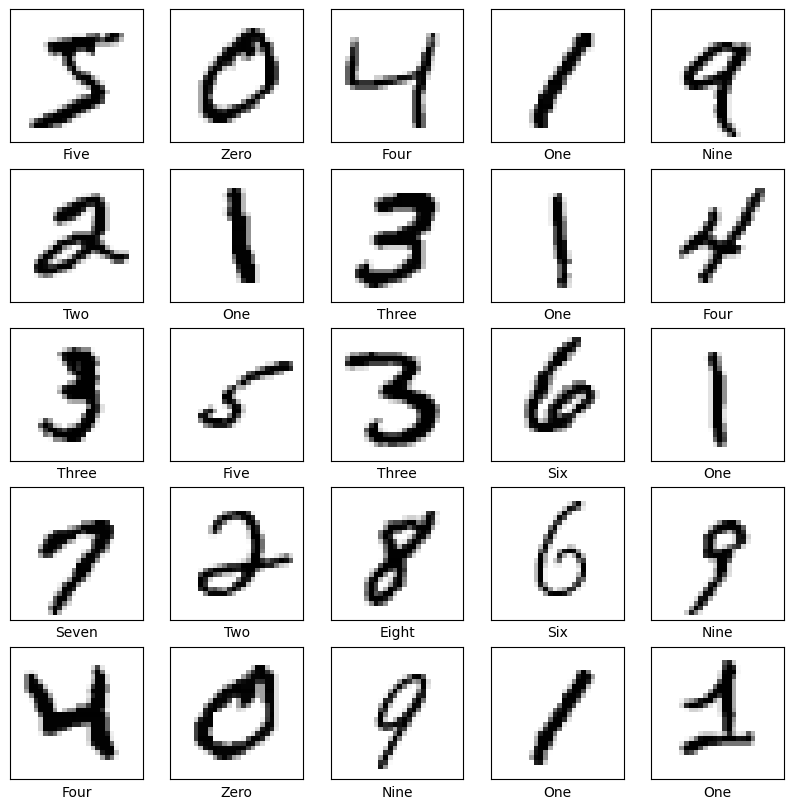

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8773 - loss: 0.4379
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9643 - loss: 0.1238
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9769 - loss: 0.0795
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9826 - loss: 0.0571
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9870 - loss: 0.0432
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9893 - loss: 0.0354
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9913 - loss: 0.0277
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9944 - loss: 0.0204
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9949 - loss: 0.0168
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9963 - loss: 0.0139
313/313 - 0s - 2ms/step - accuracy: 0.9766 - loss: 0.0840

Test accuracy: 0.9765999913215637
313/313 ━━━━━━━━━━━━━━━━━━

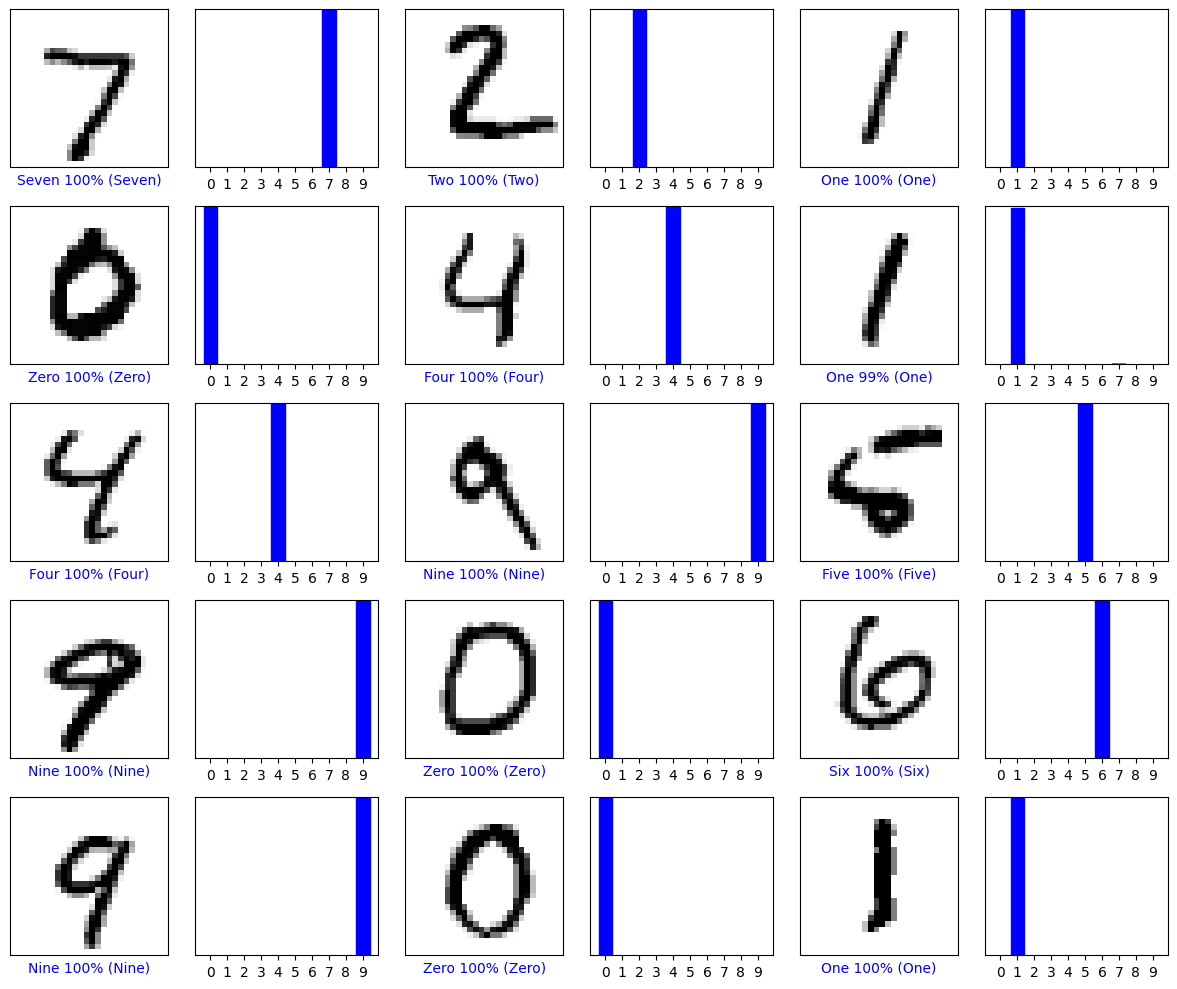

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[7.7021505e-12 9.4895420e-08 9.9999988e-01 6.7906551e-09 2.1949749e-23
  1.5104114e-11 3.9096452e-12 6.4516495e-19 2.9205074e-09 3.9219420e-18]]


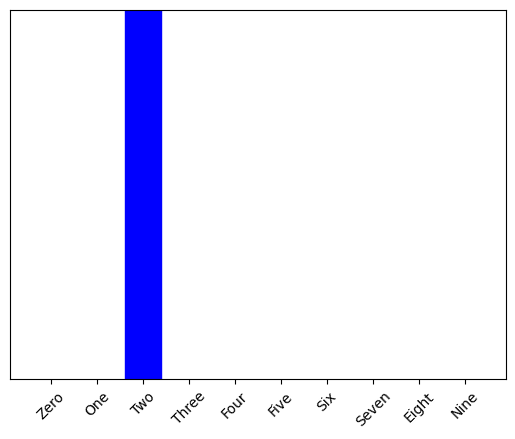

2

In [25]:
#Q3.1 

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

print(tf.__version__)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
     
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

train_images.shape

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#building the neural network model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

#prediction images
predictions = probability_model.predict(test_images)

predictions[0]

np.argmax(predictions[0])

test_labels[0]

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#use the trained model
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

np.argmax(predictions_single[0])

2.17.1


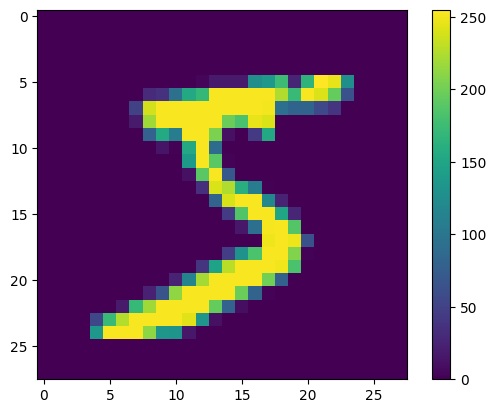

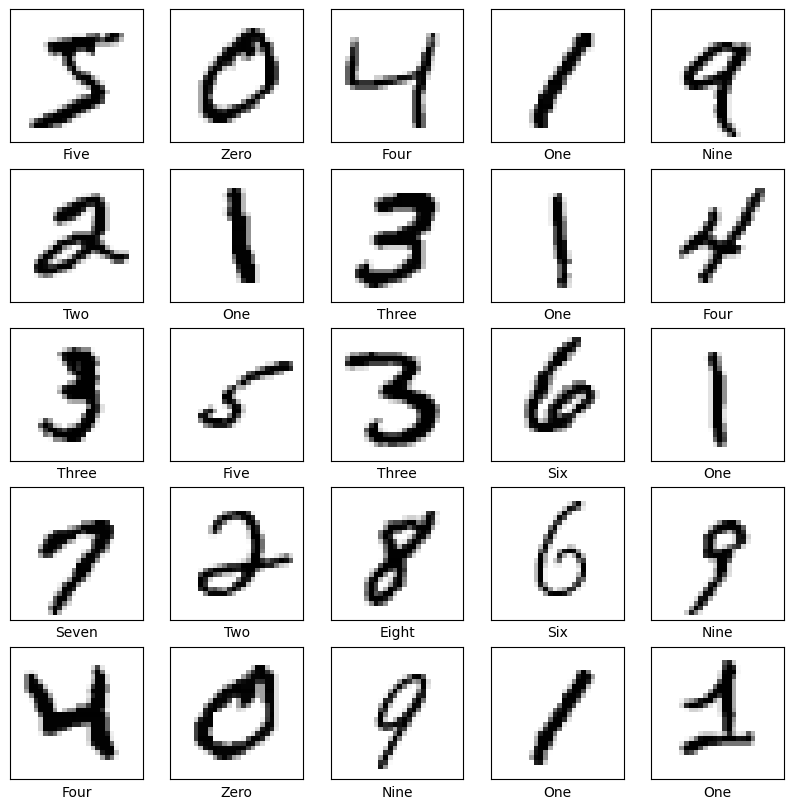

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8352 - loss: 0.5871
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9336 - loss: 0.2305
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9498 - loss: 0.1759
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9572 - loss: 0.1444
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9628 - loss: 0.1248
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9667 - loss: 0.1129
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9695 - loss: 0.1059
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9714 - loss: 0.0949
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9746 - loss: 0.0857
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9760 - loss: 0.0796
313/313 - 0s - 1ms/step - accuracy: 0.9647 - loss: 0.1209

Test accuracy: 0.9646999835968018
313/313 ━━━━━━━━━━━━━━━━━━

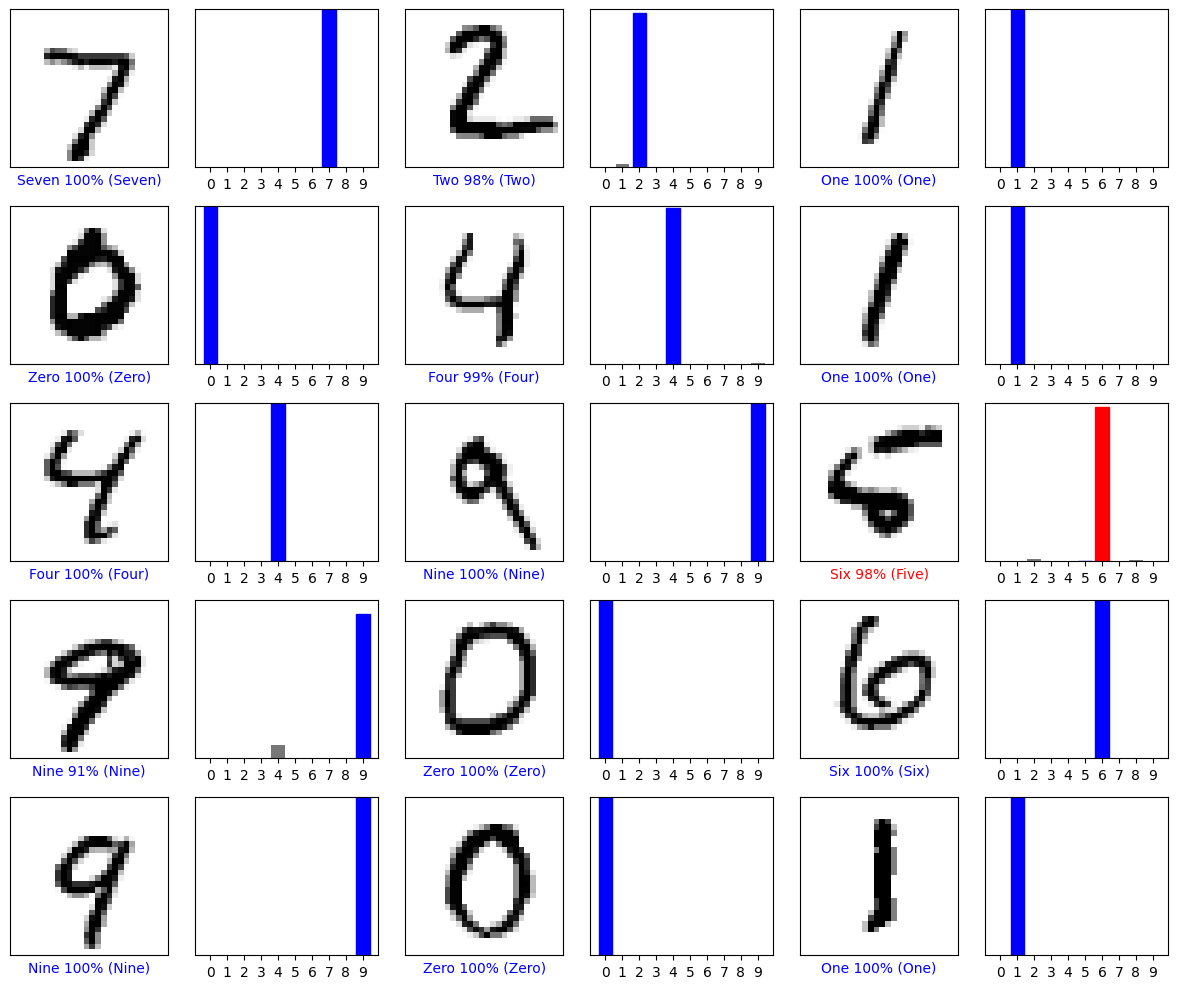

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[3.2675248e-06 2.1423660e-02 9.7755402e-01 9.7731105e-04 3.0626393e-16
  3.9839226e-05 5.0941896e-08 2.7780725e-10 1.8576932e-06 8.6097163e-10]]


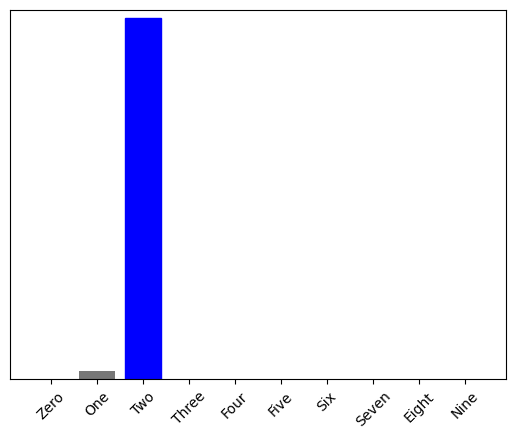

2

In [26]:
#Q3.2

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

print(tf.__version__)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
     
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

train_images.shape

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#building the neural network model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

#prediction images
predictions = probability_model.predict(test_images)

predictions[0]

np.argmax(predictions[0])

test_labels[0]

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#use the trained model
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

np.argmax(predictions_single[0])

2.17.1


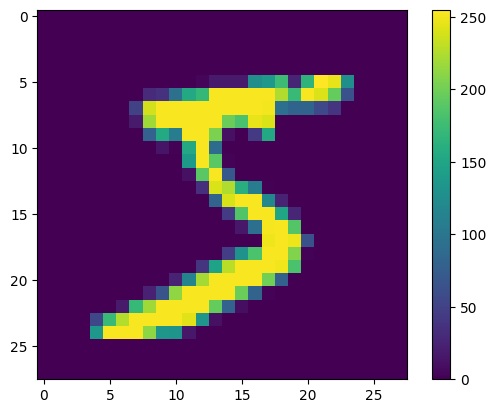

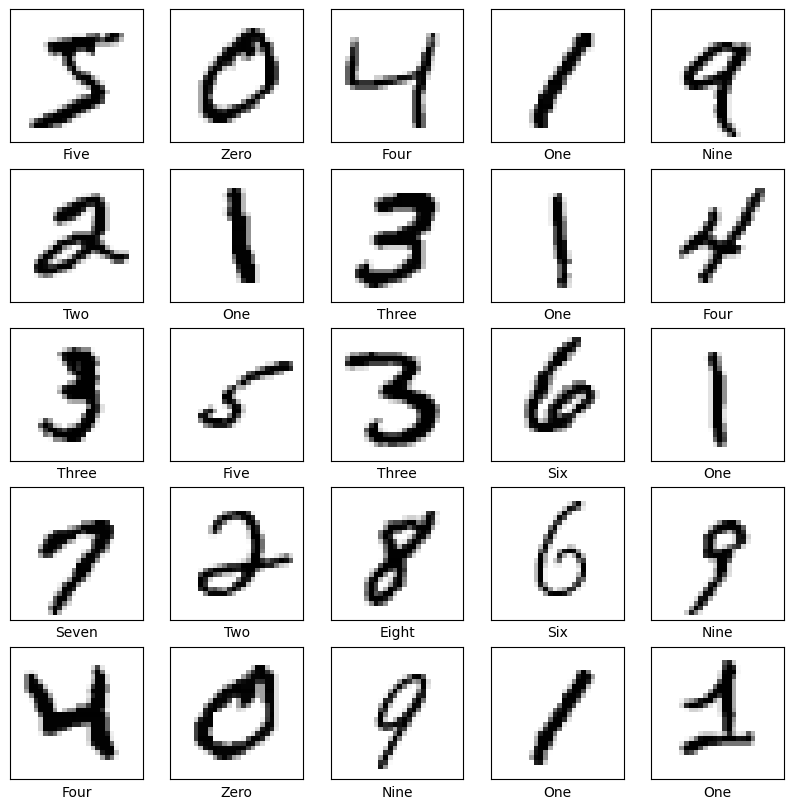

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8557 - loss: 0.5106
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9515 - loss: 0.1689
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9656 - loss: 0.1187
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9720 - loss: 0.0959
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9771 - loss: 0.0784
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9808 - loss: 0.0650
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9826 - loss: 0.0580
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9853 - loss: 0.0491
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9875 - loss: 0.0414
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9880 - loss: 0.0376
313/313 - 0s - 2ms/step - accuracy: 0.9705 - loss: 0.0999

Test accuracy: 0.9704999923706055
313/313 ━━━━━━━━━━━━━━━━━━

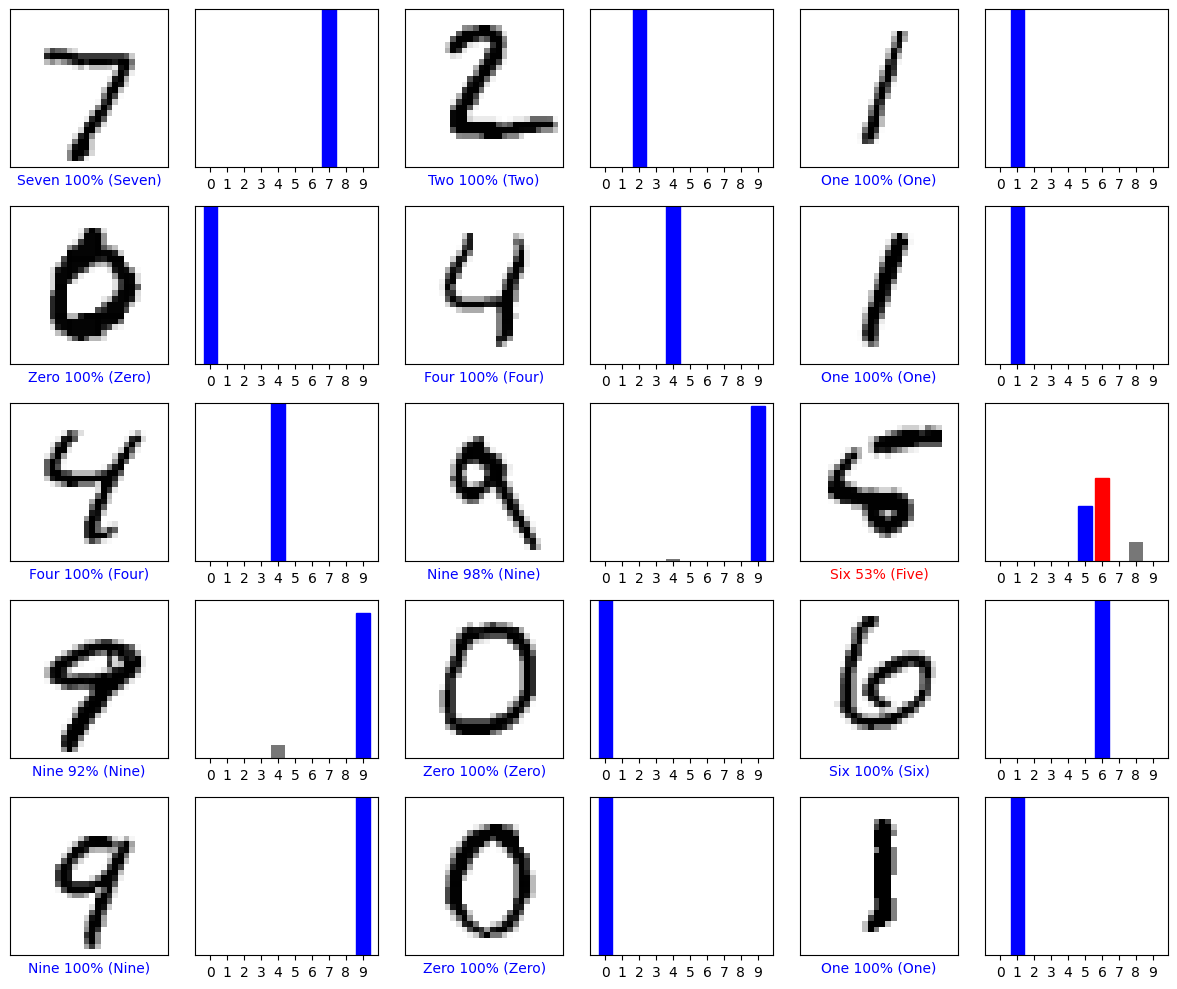

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[8.0811635e-10 7.1441150e-06 9.9999285e-01 5.0783497e-09 1.2433862e-23
  5.3173209e-11 8.4550417e-10 9.9875284e-18 1.4300175e-09 1.1368486e-19]]


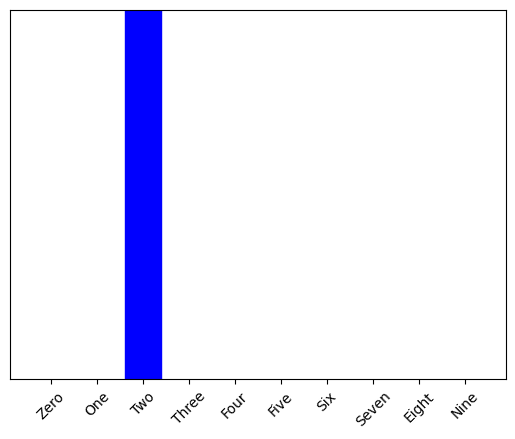

2

In [27]:
#Q3.3

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

print(tf.__version__)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
     
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

train_images.shape

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#building the neural network model for 56 neurons

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(56, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

#prediction images
predictions = probability_model.predict(test_images)

predictions[0]

np.argmax(predictions[0])

test_labels[0]

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#use the trained model
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

np.argmax(predictions_single[0])

2.17.1


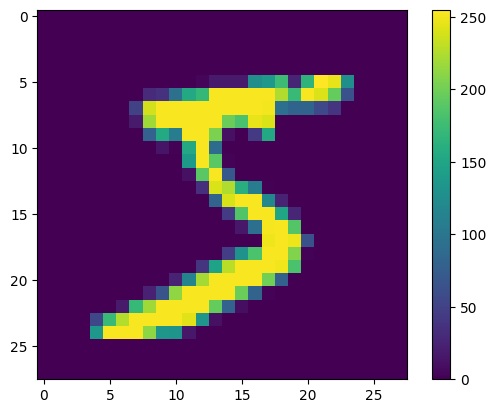

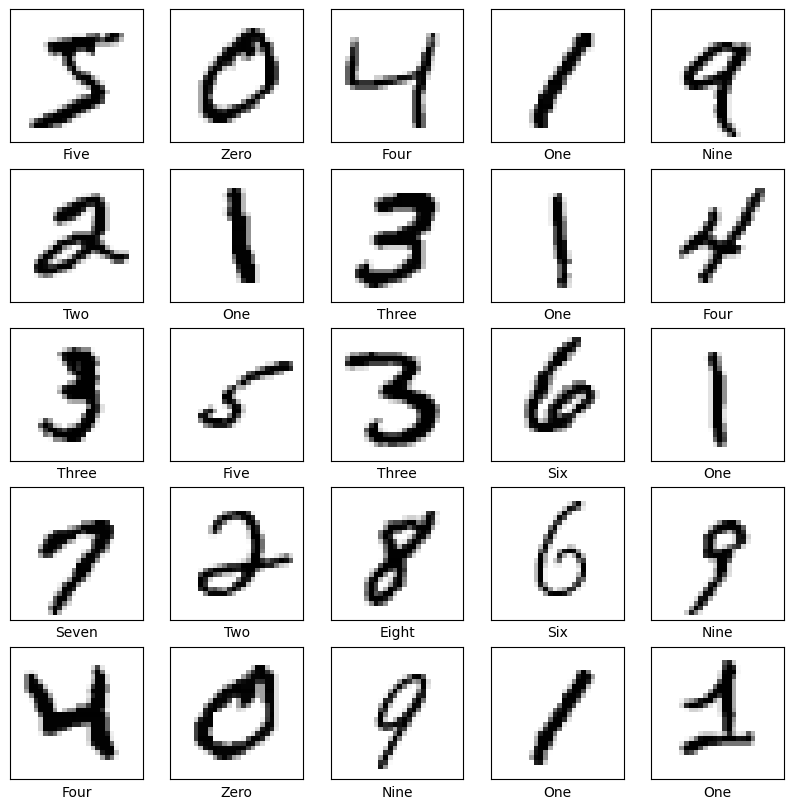

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8622 - loss: 0.4644
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9614 - loss: 0.1241
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9734 - loss: 0.0869
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9792 - loss: 0.0648
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9826 - loss: 0.0539
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9852 - loss: 0.0427
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9878 - loss: 0.0369
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9908 - loss: 0.0282
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9924 - loss: 0.0243
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9927 - loss: 0.0224
313/313 - 0s - 2ms/step - accuracy: 0.9740 - loss: 0.1061

Test accuracy: 0.9739999771118164
313/313 ━━━━━━━━━━━━━━━━━━

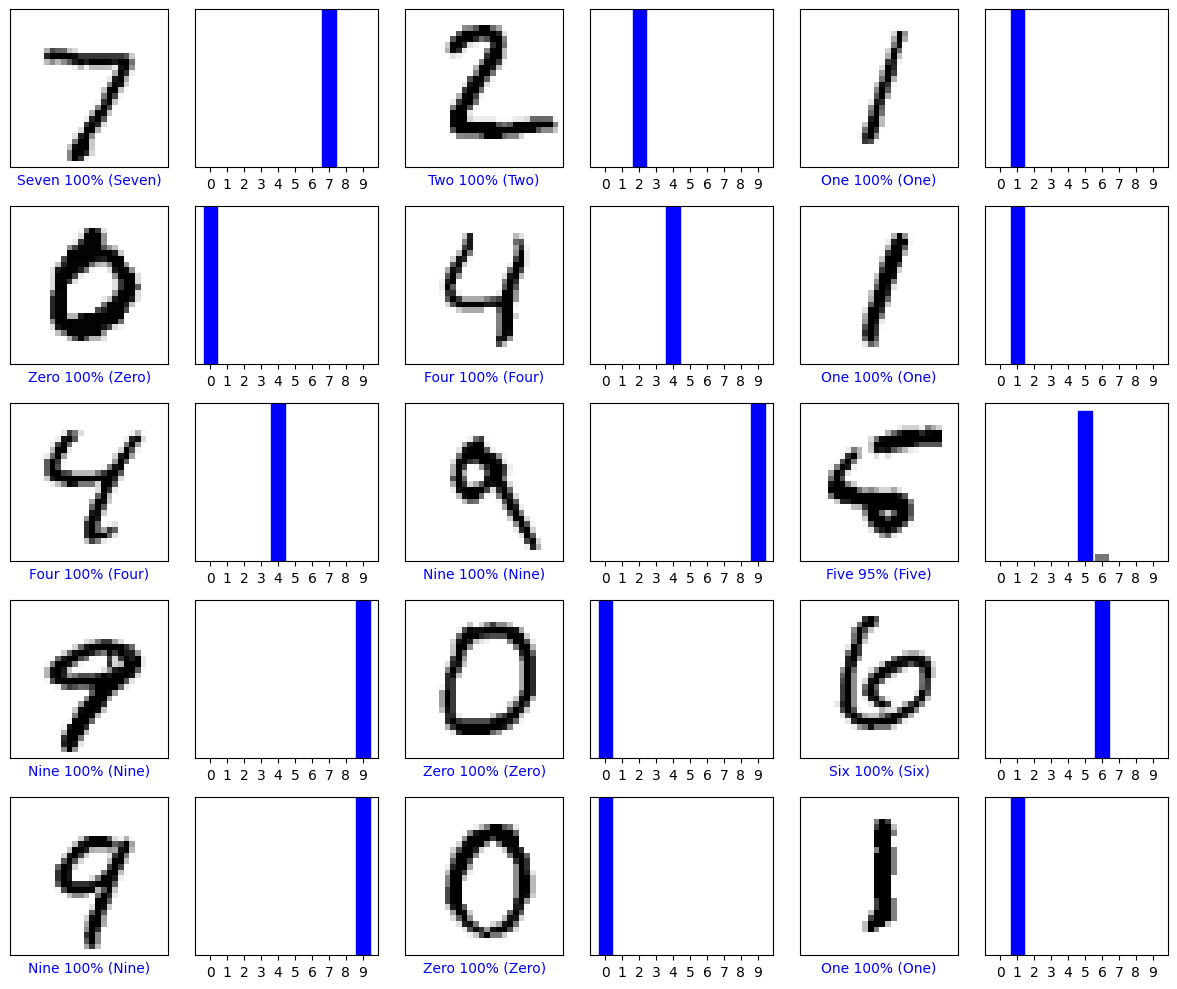

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[1.1964479e-12 2.7875095e-11 1.0000000e+00 8.5296490e-09 4.0177258e-16
  8.2052296e-13 3.3229737e-13 7.8255943e-15 2.7454554e-11 1.7059619e-17]]


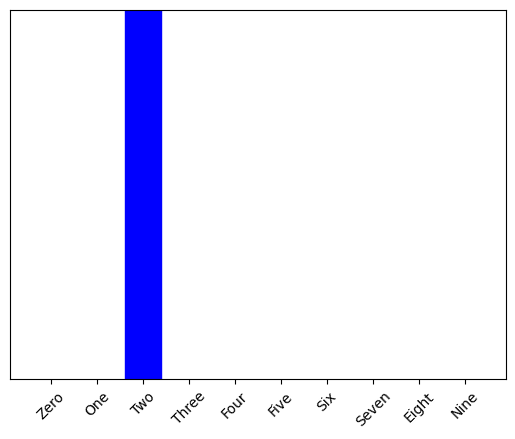

2

In [28]:
#Q3.4

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

print(tf.__version__)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
     
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

train_images.shape

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#building the neural network model with third layer and neurons

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(56, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

#prediction images
predictions = probability_model.predict(test_images)

predictions[0]

np.argmax(predictions[0])

test_labels[0]

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#use the trained model
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

np.argmax(predictions_single[0])

In [ ]:
#Q3.5 Compare the accuracies 

# The MLP with the second layer produced the highest accuracy score with no discrepancy 

# The MLP with the same neurons as the input produced one discrepancy amongst the number 5 and 6 with it saying the number 5 is 98% 6.  It has the lowest test accuracy score.  

# The MLP with the doubled amount of input entered as neurons one discrepancy amongst the number 5 and 6 with it saying the number 5 matches 53% for 5, but could also be 6 or 8. 

#The MLP with the third layer of the highest amount of neurons came in second with test accuracies and no discrepancies.  

In [ ]:
# Q4
# Summarization of keys observations in Q1, Q2, and Q3:

# The L1 and L2 distances varies greatyly. Plotting these metrics reflect the l2 distance being more a line while the l1 metrics are more disbursed. 

# the k nearest neighbors for each class showed the same texture 

# As the k classifiers increased, so did the executing time to execute the code 
# The MLP with the second layer produced the highest accuracy score with no discrepancy 

# The MLP with the same neurons as the input produced one discrepancy amongst the number 5 and 6 with it saying the number 5 is 98% 6.  It has the lowest test accuracy score.  

# The MLP with the doubled amount of input entered as neurons one discrepancy amongst the number 5 and 6 with it saying the number 5 matches 53% for 5, but could also be 6 or 8. 

#The MLP with the third layer of the highest amount of neurons came in second with test accuracies and no discrepancies.  

In [29]:
# Q5.1, code takes a very long time run and complete

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import accuracy_score

# Custom KNN class
class KNN:
    def __init__(self, num_neighbors: int = 5):
        self.num_neighbors = num_neighbors
        
    def fit(self, X: np.array, y: np.array):
        """
        Memorize training data
        """
        self.X = X
        self.y = y
        
    def get_distance(self, a: np.array, b: np.array):
        """
        Calculate Euclidean distance between two examples
        """
        return np.sum((a - b) ** 2) ** 0.5

    def get_neighbors(self, example: np.array):
        """
        Find and rank nearest neighbors of example
        """
        distances = []

        # calculate distances as tuples (id, distance)
        for i in range(len(self.X)):
            distances.append((i, self.get_distance(self.X[i], example)))

        # sort by distance
        distances.sort(key=lambda x: x[1])

        # return IDs and distances top neighbors
        return distances[:self.num_neighbors]

    def predict(self, X: np.array):
        """
        Predict labels for each example in X
        """
        predictions = []

        for idx in range(len(X)):
            example = X[idx]
            k_neighbors = self.get_neighbors(example)
            k_y_values = [self.y[item[0]] for item in k_neighbors]
            prediction = np.bincount(k_y_values).argmax()  # Most common class among neighbors
            predictions.append(prediction)

        return np.array(predictions)

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data: Normalize and flatten the images
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28 * 28)  # Flatten images
x_test = x_test.reshape(-1, 28 * 28)

# Initialize the custom KNN model
knn = KNN(num_neighbors=5)

# Fit the model on the training data
knn.fit(x_train, y_train)

# Predict on the test data
y_pred = knn.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Custom KNN Model Accuracy on Fashion MNIST: {accuracy * 100:.2f}%')

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


KeyboardInterrupt: 

In [30]:
# Q5.1

import numpy as np
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data: Normalize and flatten the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the data for the KNN model (reshape from 28x28 to 784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)

# Train the KNN model
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Model Accuracy on Fashion MNIST: {accuracy * 100:.2f}%')

KNN Model Accuracy on Fashion MNIST: 84.60%


In [ ]:
# Q5.2 Compare accuracies of MLP on fashion MNIST and KNN from Bonus Q1

# The KNN accuracy test ont the fashion MNIST dataset is much lower than MLPs accuracy test on the fasion MNIST dataset
